In [142]:
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import Image
np.random.seed(0) #fix seed so everyone has the same result

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Basic Introduction into Conditional Density Estimation
---------------------------------------------------
Welcome to my tutorial that aims to give you a short introduction into the topic of "Conditional Density Estimation" with an application to Photometric Redshift Estimation. We will first start with a short theory introduction and then move towards a practical implementation of a conditional density estimate. This Tutorial closes with an application to LSST photometric redshifts. I will host a general sprint tomorrow where I will work on including the work from a student of Rachel and me (Olivia Lie) on conditional density estimation with error quantification into the gcr catalogs. The following short introduction is based on the following references and references therein. Some of the following text comes from my thesis that everyone is very welcome to read :-)

Recommended Literature: 
-----------------------
Bishop (2006): Christopher M. Bishop. 2006. Pattern Recognition and Machine Learning (Information Science and Statistics). Springer-Verlag, Berlin, Heidelberg.

Hastie, T., Tibshirani, R.,, Friedman, J. (2001). The Elements of Statistical Learning. New York, NY, USA: Springer New York Inc..

Rau, Markus Michael  (2017):  Photometric redshift estimation for precision cosmology.  Dissertation, LMU München: Faculty of Physics 

Regression
----------


The basic task of regression it to estimate the functional relationship between a given set of
inputs x and a target variable $t$. In Fig. 2.3 we illustrate a typical regression setting, where
the blue points correspond to the data that we want to model. We see that these datapoints
do not follow an exact functional relationship, but instead have an intrinsic scatter around
the true function shown in red. The modelling is therefore not restricted to determining this
function, but also includes the estimation of the predictive distribution $p(t|x)$ of the target
variable t given the input x. 
In analogy to the discussion in the previous section, we model the conditional distribution
as a Gaussian, where the mean is given by a polynomial function $y(x, w)$ and the variance $β$
is assumed to be independent of $x$

$$p(t|x, w, \sigma^2) = \mathcal{N}(t|y(x, w), \sigma^2)$$


If we do not have any prior information about the functional form of $y(x, w)$ we can assume
a very complex function that will adapt to the data. A simple choice could be a polynomial
model or, more general a linear basis function model

$$y(\mathbf{x}, \mathbf{w}) = \sum_{j = 1}^{M - 1} w_j \phi_j(\mathbf{x}) = \mathbf{w}^{T} \phi(\mathbf{x})$$

where $w = (w_0, . . . , w_{M−1})^T$ is a M dimensional vector of free model parameters, or weights.


In the corresponding basis function vector $\boldsymbol{\phi} = (\phi_0, . . . , \phi_{M−1})^T$ we define $\phi_0 = 1$ such, that the first weight is an offset to the function. The basis functions $\boldsymbol{\phi}$ themselves can be e.g.
linear combinations, polynomial terms or Gaussians that depend on the input x. To give an
example, consider the case of a single input variable x, where we obtain a polynomial model
by setting $φ_j(x) = x^j$. The choice of suitable basis functions will strongly depend on the data
at hand and has to be carefully chosen in advance to reflect our intuition about the data.
With a linear basis function model for the mean of the conditional distribution, we obtain the
likelihood as
$$p(\mathbf{t} | \mathbf{X}, \mathbf{w}, \sigma^2) = \prod_{i = 1}^{N} \mathcal{N}(t_i | y(\mathbf{x}_i, \mathbf{w}), \sigma^2)$$
where the data D consists of a set of N input variables $X = \{x_i|0 < i \leq N\}$ with their
associated target values $t = \{t_i | 0 < i \leq N\}$. In analogy to the previous section, we jointly optimize the log-likelihood with respect to the free parameters w of the mean function
$y(x, w)$ and the variance $\sigma^2$.

There are two sets of parameters in this model: the weights that describe the mean of the conditional distribution and the standard deviation $\sigma$. In this case we assume that the width of the conditional PDF is independent on input positions $\sigma(x) = \sigma$. 

The maximum likelihood estimator for the weights and standard deviation are given as
$$\mathbf{w}_{\rm ML} = (\boldsymbol{\Phi}^{T} \boldsymbol{\Phi})^{-1} \boldsymbol{\Phi}^{T} \mathbf{t}$$
where $\boldsymbol{\Phi}$ has components $\phi_{n j} = \phi_j(\mathbf{x}_n)$.
$$\sigma_{\rm ML}^2 = \frac{1}{N} \sum_{i = 1}^{N} \left(t_i - y(\mathbf{x}_i, \mathbf{w}_{\rm ML})\right)^2$$

Of course if we expect a more complicated functional form for the conditional Density we want to make another ansatz e.g. a input dependent variance or a mixture model. 

Furthermore instead of simply evaluating the maximum likelihood estimate we often want to quantify the uncertainty in $\mathbf{w}$ or $\sigma$. Depending on the imposed model the typical inference schemes like Variational Inference, MCMC sampling, etc. are available.

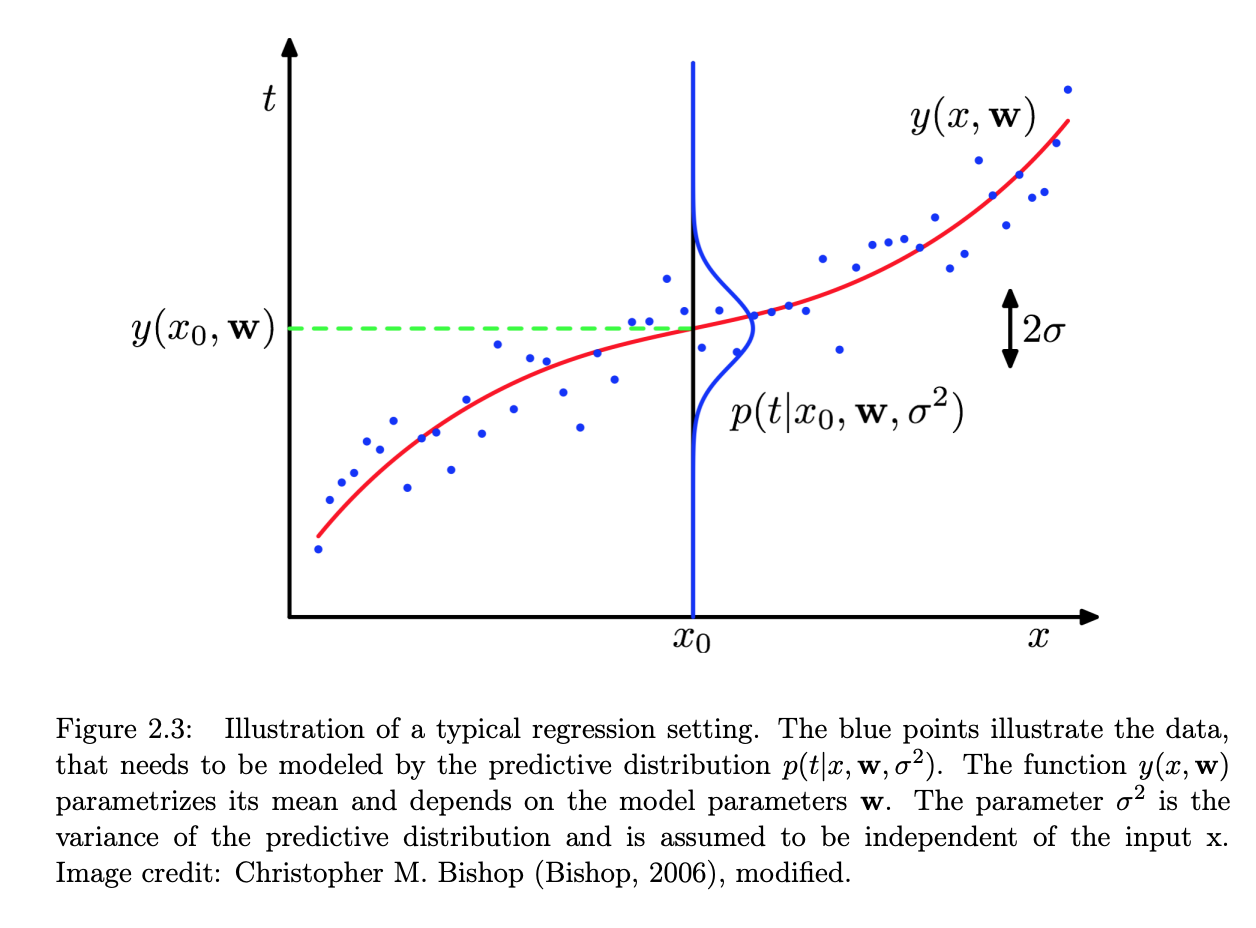

In [143]:
Image(filename='cond_pdf.png', width=600) 

Classification
----------


One of the simplest discrete random
experiments is the coin toss, where a potentially biased coin is thrown to yield either heads or
tails. If we parametrize the possible states as $s = {0, 1}$, the probabilities for the individual
outcomes $p(X = 1) = \mu$ and $p(X = 0) = 1 − \mu$ depend only on the ‘success rate’ $\mu$. The corresponding probability distribution for this process is then given as

$$p(X = s) = \mu^s (1 − µ)^{1−s}$$

For a dataset $\mathcal{D}$, the log-likelihood of the Bernoulli distribution can be obtained
as 
$$\log{p(\mathcal{D}|\mu)} = \sum_{i = 1}^{N} x_i \log{\left(\mu\right)} + (1 - x_i) \log{\left(1 - \mu\right)}$$
and we can obtain the maximum likelihood solution for $\mu$ as the sample mean
$$\mu_{\rm ML} = \frac{1}{N} \sum_{i = 1}^{N} x_i$$

In analogy to the previsouly discussed Regression case we parametrize the free parameter in the log-likelihood using a flexible function. In the case of classification this is the success probability $\mu = y(\mathbf{x}, \mathbf{w})$, that is on the $[0, 1]$ scale
$$y(\mathbf{x}, \mathbf{w}) = \frac{1}{1 + \exp{\left(- \mathbf{w}^{T} \boldsymbol{\Phi}(\mathbf{x}) \right)}}$$

Again one can apply a optimization scheme to obtain maximum likelihood values for $\mathbf{w}_{\rm ML}$ or inference techniques to obtain posteriors on these parameters.

We finally note that the evaluation of classification methods works slightly different than in the regression case, since class inbalances can lead to misleading results. We will not discuss ML model evaluation in great detail and refer to the literature for a discussion on ROC curves and conceps like purity and completeness. 

Bias-Variance Tradeoff
-------------

In order to gain more insights into the tradeoff between model complexity and fitting accuracy,
Consider the sum of squared error function $p(\mathbf{x}, t)$

$$L = \iint \left(y(\mathbf{x}) - t \right)^2 p(\mathbf{x}, t) dt d\mathbf{x}$$

Applying the variational principle to optimize $y(\mathbf{x})$ and taking the expectation wrt. different datasets we obtain: 

$$E_{\mathcal{D}}[L] = (bias)^2 + variance + noise$$

where the different terms are: 

$$(bias)^2 = \int \{E_{\mathcal{D}}[\hat{y}(\mathbf{x}; \mathcal{D})] - y(\mathbf{x})\}^2 p(\mathbf{x}) d\mathbf{x} $$

$$variance = \int E_{\mathcal{D}}[\left(\hat{y}(\mathbf{x}; \mathbf{D}) - E_{\mathcal{D}}[\hat{y}(\mathbf{x}; \mathcal{D})]\right)^2] p(\mathbf{x}) \, d\mathbf{x}$$

$$noise = \iint \, (y(\mathbf{x}) - t)^2 p(\mathbf{x}, t)\, d\mathbf{x} dt$$

Here, $y(\mathbf{x})$ denotes the true, unknown, functional form of the conditional mean and $\hat{y}(\mathbf{x}; \mathcal{D})$ and estimate.

The bias term quantifies how well our estimate on average coincides with the
conditional mean. This term is large, if we select a model that is not complex enough to
capture the underlying structure in the data and it is small, if we consider complex models.
The variance does not depend on the true function y(x) and quantifies how strongly
the fitted models vary between the generated datasets. This variance term is in general large,
if a too complex model is fitted to a relatively small dataset as shown in the lower left panel of
the following figure. If the variance contributes significantly to the total error, it is advisable to consider
less complex models that are more stable and thus have a smaller variance or, even better,
collect more data. The intrinsic noise does not depend on our estimate yˆ(x; D)
and represents the irreducible error in the data. We conclude, that in order to optimize
the complexity of the model, we have to trade-off the bias and variance terms that both
contribute to the expected sum of squared loss for regression. This can be achieved by varying
the complexity of the model and subsequently estimating the expected loss on unseen data. 

This motivates splitting a dataset into three parts: training, cross-validation and test set. The test set is never used exept once after all prior steps of model training and data preprocessing to evaluate model perfrmance. The training set is used to train the model and the cross validation dataset to calibrate the setup of the ML architecture.


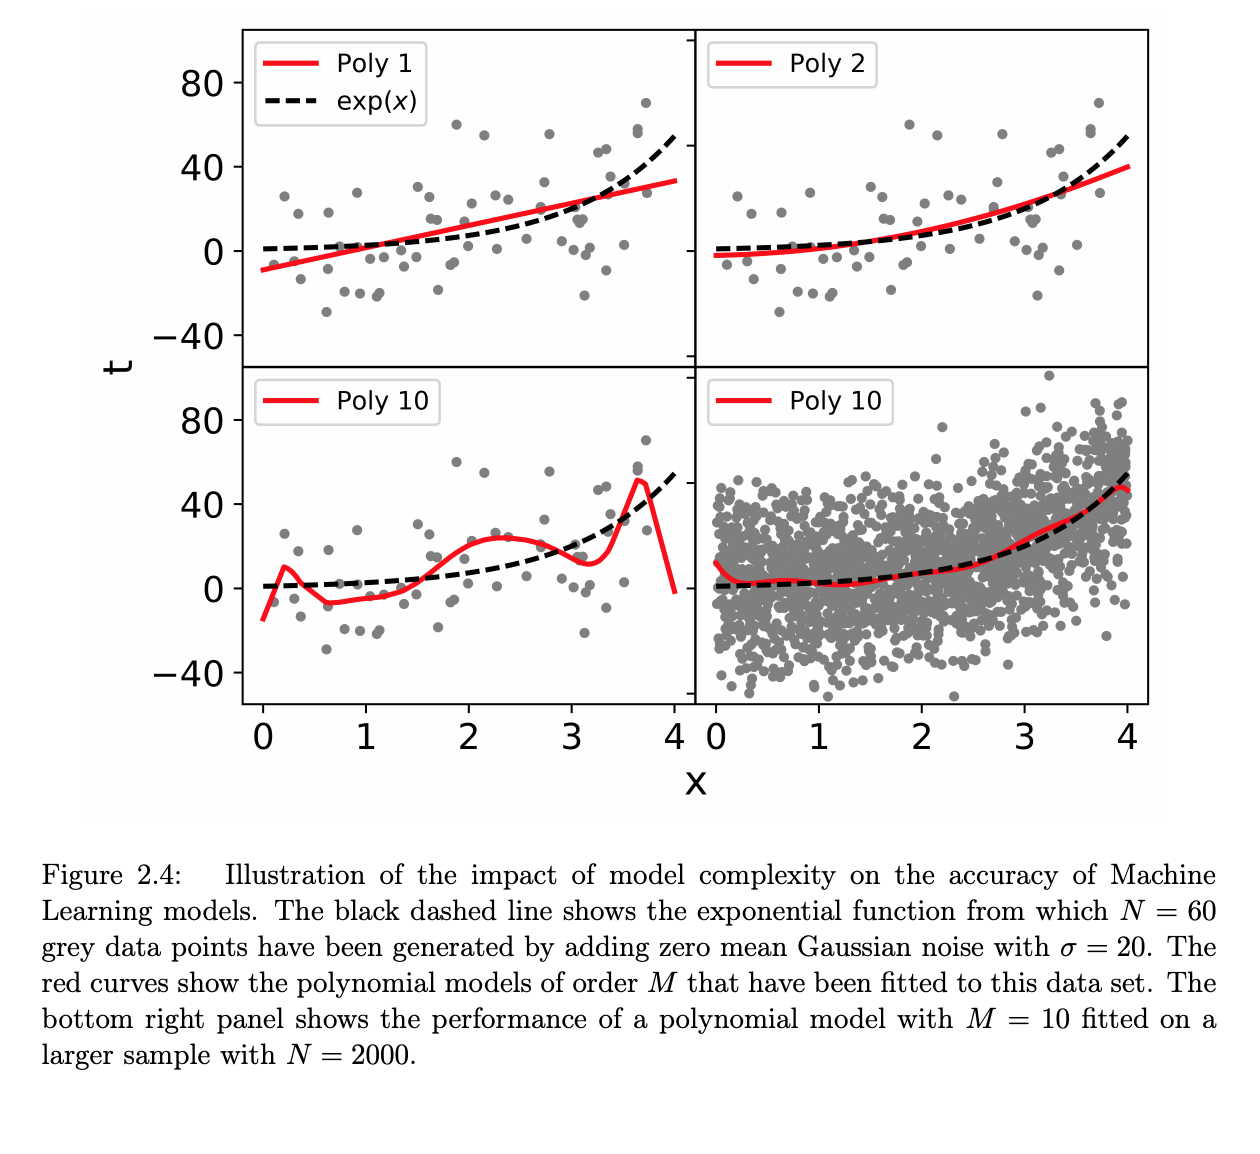

In [144]:
Image(filename='bias_variance.png', width=600) 

We illustrate the tradeoff between bias and variance in Figure 2.4, where we estimate an exponential function from the
underlying data shown in grey using a polynomial model. While the simple linear model (‘Poly
1’) is not complex enough to capture the nonlinear structure in the data, adding higher order
polynomial terms does not always improve the quality of the recovered model, but can instead
lead to overfitting as shown in the lower left panel for a 10th order polynomial (‘Poly 10’).
Here the complex model is adapting too tightly to the small amount of available data and
thus strongly fluctuates around the truth. For this small sample, a quadratic model (‘Poly 2’)
produces the best fit. Increasing the data sample to $N = 2000$ points, significantly stabilizes
the high order polynomial, which now perfectly recovers the underlying exponential function.
This simple experiment demonstrates, that the complexity of the model needs to be balanced
with the nonlinearity of the data, as well as the number of available data samples. If we have
more data available, we can increase the model complexity to more accurately capture the
complex structure in the data. In contrast, if data is sparse, increasing the complexity of the
fit, can even lead to greater errors than a more simplistic model.

Lets experiment a bit with model complexity. The following cell contains a simple regression example: we can change the number of samples, the degree of the polynomial and the noise imposed on the response variable. Please feel free to play around to investigate the aforementioned tradeoff between bias and variance.

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy.random import normal

def get_prediction(n_samp, poly_order, noise=0.2): 
    xlim = np.linspace(0.0, 1.0, num=100)
    model = LinearRegression()
    x = np.random.uniform(0.0, 1.0, size=n_samp).reshape(-1, 1)
    y = np.exp(x[:, 0]) + np.array([normal(0.0, scale=noise) for _ in range(len(x))])
                              
    poly = PolynomialFeatures(degree=poly_order)
    x_poly_features = poly.fit_transform(x)
    model.fit(x_poly_features, y)
    x_poly_xlim = poly.fit_transform(xlim.reshape(-1, 1))
    return xlim, model.predict(x_poly_xlim), x, y

In [266]:
results_new = get_prediction(100, 10)

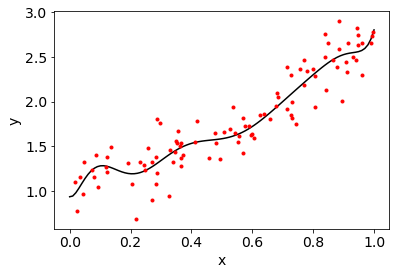

In [270]:
plt.plot(results_new[0], results_new[1], color='black')
plt.plot(results_new[2], results_new[3], '.', color='red')
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

Selection Functions and Biases
--------------------------

The training data used in a Machine Learning algorithm is representative, if it
was drawn from the same parent distribution as the test data. In many practical applications
however, this cannot be guaranteed and we have to consider several effects, that can bias the
training data. In photometric redshift estimation, often spectroscopic data is used. Obtaining representative spectroscopic samples requires long exposure times, especially at the faint end of the magnitude space.  Therefore spectroscopic training samples for photometric redshift estimation are typically incomplete. 

Viewed in a simplified manner, there are two types of selection functions that we can face. In the first case the training set has a different distribution in the features, in photoZ estimation colors, than the test set, i.e. the feature variables $x_T$ and target values $t_T$ are biased in terms
of the marginal distribution $p(x_T)$. This is shown as the grey band in the right plot. In statistics this is often called covariat shift and there are ways to correct for possible biases (e.g. by reweighting). The other possible bias happens if there is an incompleteness in terms of the target values. In spectroscopic redshift estimation this could happen if there is a depletion of high confidence galaxy redshifts as a function of redshift (e.g. because characteristic features of the spectrum shift outside of the spectral range). These selection biases directly affect the conditional distribution $p(t_T |x_T )$ and a correction can be impossible in these cases if there is no physical modelling available. The red band shows in the right panel illustrates this effect. 

The left plot illustrates another aspect of photometric redshift estimation in a very simplified manner. Both panels illustrate how the g-r color of an elliptical and SCD galaxy change as as function of distance, or redshift. The left panel illustrates that conditional distributions can be multimodal in color-redshift space. Of course if one uses more colors this will be less extreme, but for broad band photometry there persist mismatches between SED type and redshift. In the context of conditional density estimation this will be manifested in multimodality invalidating the Gaussian assumption. The grey vertical band illustrates here the conditional distribution. 

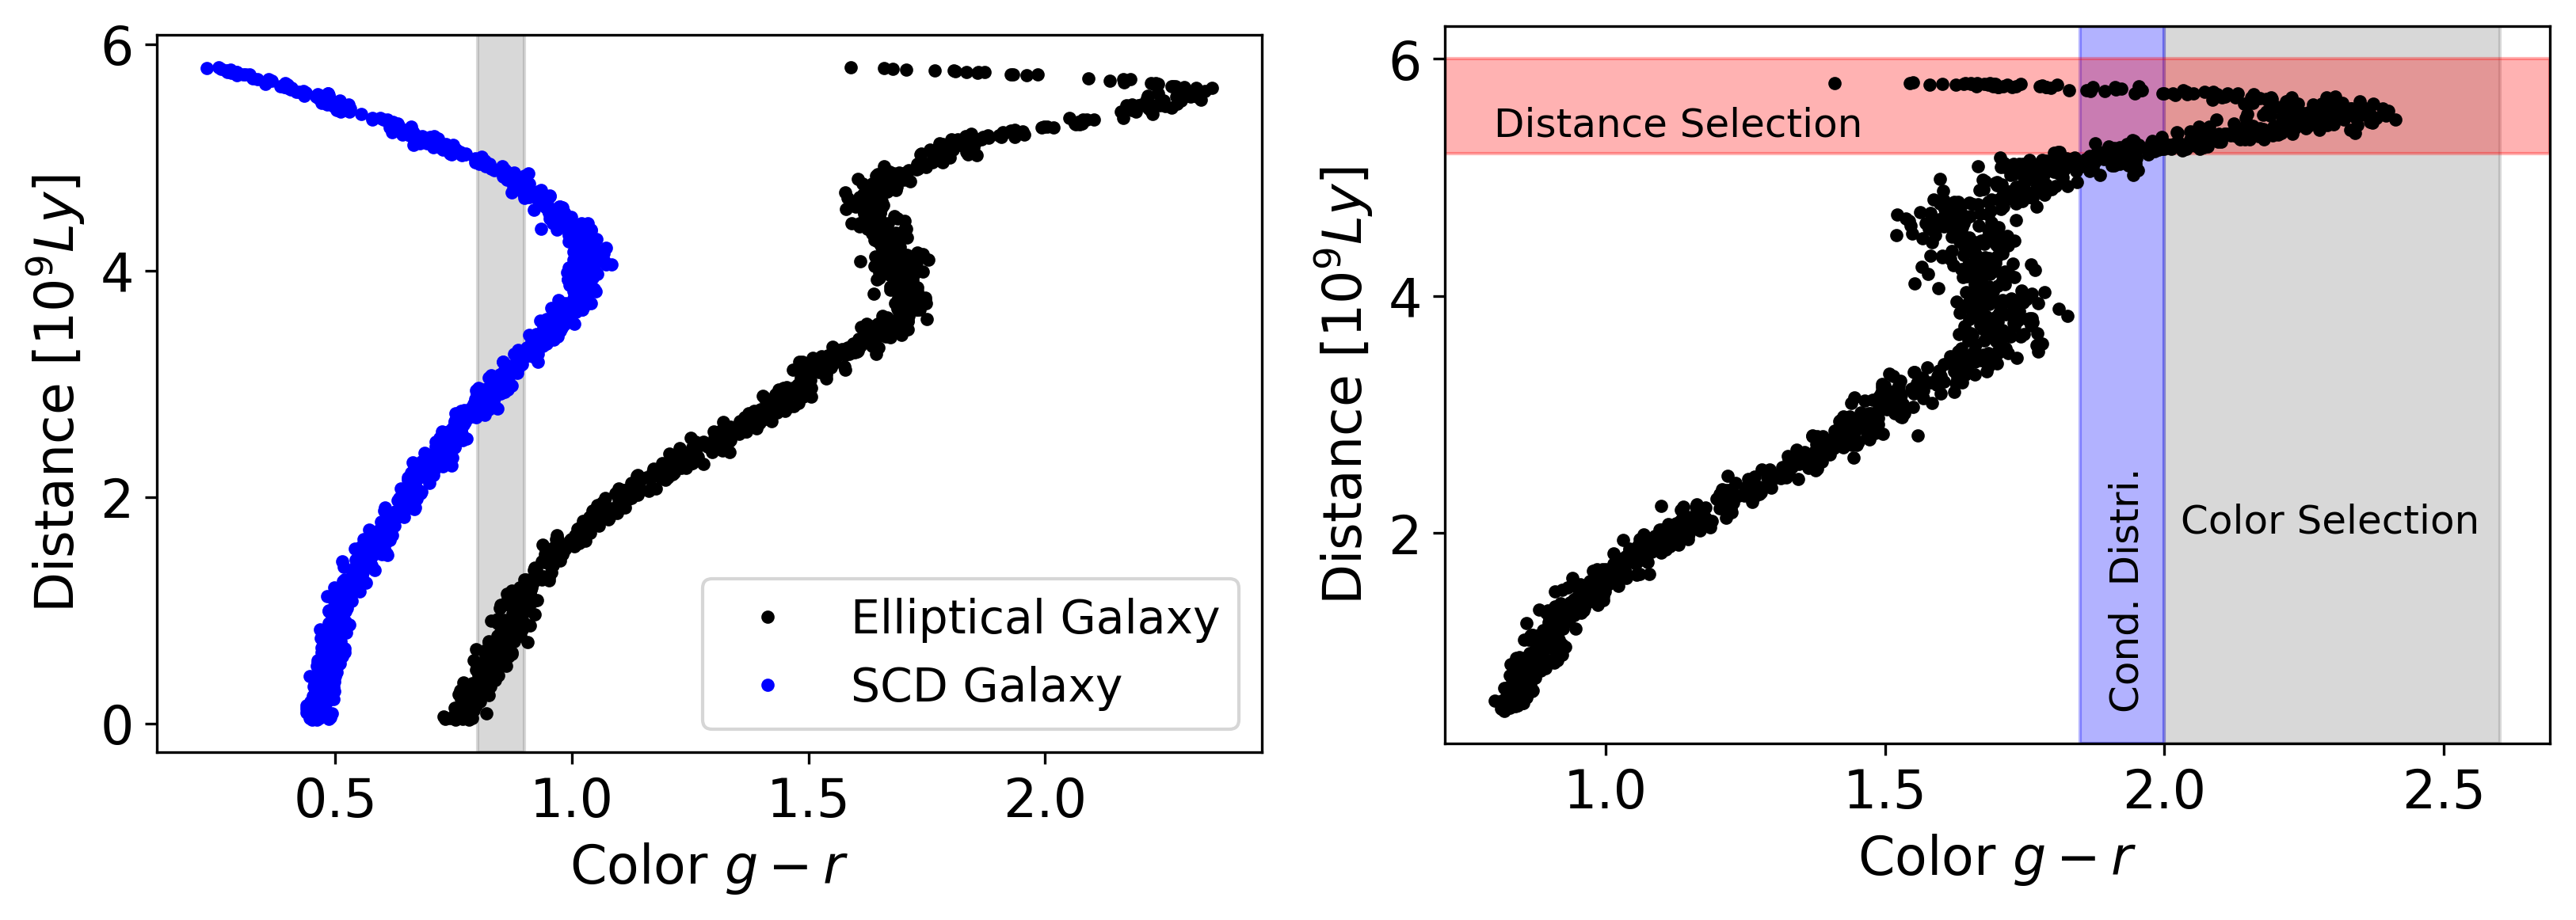

In [145]:
Image(filename='merged_selection_effects.png', width=900) 

Application: Photometric Redshift Estimation
---------------------------------------

In the following we will put the learned concepts into practise by implementing a conditional density estimator based on the sklearn package and the Random Forest Classifier, where the classes are given by redshift bins. The Random Forest is a tree based Machine Learning method. A single decision tree partitions the input space (in our case the color space) recursively into binary partitions until each cell contains only galaxies of very similar redshift (or type). A Random Forest trains a number of trees on several resampled, i.e. bootstrapped, datasets. 

After the training phase that results in a set of trained decision trees, new data can be run down each tree to give a prediction on each tree. The majority vote of these decision trees wrt. to the class membership is then the final prediction of the Random Forest. For more details on the Random Forest technique we refer to the literature.

We will first require an installation of the sklearn package that contains a suitable Implementation of the Random Forest Classifier. 


In [146]:
from sklearn.ensemble import RandomForestClassifier

We will now load in the example dataset that I put into the folder and make some simple plots of the photometry and redshift distributions.


This simple test dataset contains the true redshifts and the LSST magnitudes in the filter bands as well as the galaxy id's. We also shuffle the data to avoid any intrinsic corrrelation in the data. This is an important step in the application of a ML algorithm.
The dataset columns are given as: 

| Column              | Description                          || Column              | Description
| ---------------     | -----------                          || ---------------     | ------------
| 0) galaxy_id        |  Galaxy Index                        || 8) mag_r_obs        |observed r-band magnitude
| 1) redshift_true    |   True Redshift                      || 9) magerr_r_obs     | error observed r-band magnitude
| 2) ra               |   Right ascension                    || 10) mag_i_obs       | observed i-band magnitude
| 3) dec              |    Declination                       || 11) magerr_i_obs    | error observed i-band magnitude
| 4) mag_u_obs        |    observed u-band magnitude         || 12) mag_z_obs       | observed z-band magnitude     
| 5) magerr_u_obs     |    error observed u-band magnitude   || 13) magerr_z_obs    |  error observed z-band magnitude
| 6) mag_g_obs        |   observed g-band magnitude          || 14) mag_y_obs       | observed y-band magnitude 
| 7) magerr_g_obs     |   error observed g-band magnitude    || 15) magerr_y_obs    |error observed y-band magnitude
 




In [147]:
data = np.loadtxt('datasets/data.dat') # red region in plot is the training set (train)
idx = np.random.choice(len(data), len(data))
data = data[idx, :]
z_data = data[:, 1]
photometry = np.column_stack((data[:, 4], data[:, 6], data[:, 8], data[:, 10], data[:, 12], data[:, 14]))


Visualizing the Data
--------------------

Let's visualize the basic properties of the Dataset, i.e. plotting the marginal distribution of the redshift and photometry. In particular we look for outlier populations for example u band dropouts as shown in the boxplots. A particular advantage of the Random Forest prediction is that it is relatively insensitive to outliers, so we do not explicitly deal with these missing values. For other Machine Learning models it is extremely important to think about a strategy to deal with missing values like this. 

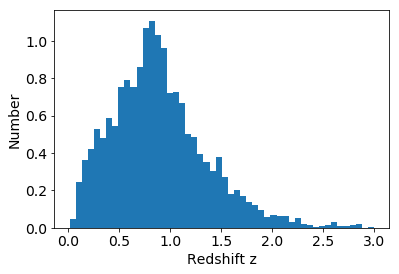

In [148]:
plt.hist(z_data, 50, normed=True, label='Redshift Distribution')
plt.xlabel('Redshift z', fontsize=14)
plt.ylabel('Number', fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

Text(0,0.5,'Magnitude Value')

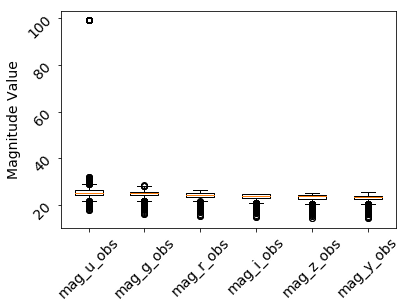

In [149]:
from matplotlib.pyplot import boxplot

boxplot(photometry, labels=['mag_u_obs', 'mag_g_obs', 'mag_r_obs', 'mag_i_obs', 
                            'mag_z_obs', 'mag_y_obs'])
plt.gca().tick_params(axis='both', which='major', labelsize=14, labelrotation=45)
plt.ylabel('Magnitude Value', fontsize=14)

Text(0,0.5,'Magnitude Value')

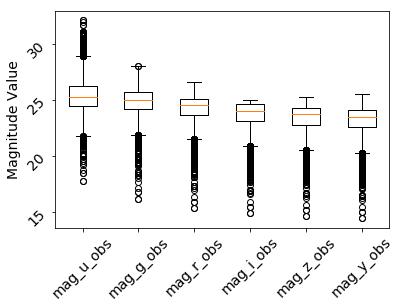

In [150]:
from matplotlib.pyplot import boxplot

boxplot(photometry[photometry[:, 0] < 90], labels=['mag_u_obs', 'mag_g_obs', 'mag_r_obs', 'mag_i_obs', 
                            'mag_z_obs', 'mag_y_obs'])
plt.gca().tick_params(axis='both', which='major', labelsize=14, labelrotation=45)
plt.ylabel('Magnitude Value', fontsize=14)

The Conditional Density Estimator
-------------------------------

The idea of our conditional density estimator is to discretize the redshift and treat these bins as classes in classification. In this way we reframe the regression problem into a classification problem, that allows us to estimate the uncertainty of our predictions in a flexible way without imposing a strict distributional form for the conditional distribution (like the Gaussian discussed earlier). 

The simplest way to do this, is to assume a histogram parametrization for the conditional distribution and treat the probability predictions as the histogram bin heights of the conditional distribution. Given a training set, we train a classifier to predict the probability that a galaxies redshift lies in a certain photometric redshift bin. For a given test set, we query all galaxies through the trained model. This results in a vector of probability predictions that can be interpreted as a histogram. The following cell implements a python class that uses the RandomForestClassifier from sklearn to implement this scheme. 


In [271]:
# Define Machine Learning method

class ClassCond(object):
    def __init__(self, classifier, bins):
        """ Class that defines the classification based 
        conditional density estimator
        
        Parameter: 
        ----------
        classifier: instance of sklearn.ensemble.RandomForestClassifier 
        bins: numpy array, z-grid for the classifier
        
        """
        self.bins = bins
        self.clf = classifier

    def fit(self, X, Y):
        """ fit a classification based
        conditional density estimator p(Y | X)
        
        Parameter: 
        ----------
        X: numpy array (n_samples, n_features), input features
        Y: numpy array (n_samples, 1), target variable
        
        """
        self.Y = np.array(Y, dtype=np.double)
        grid_Y = np.linspace(np.min(Y), np.max(Y), num=self.bins)
        self.delta_z = grid_Y[1:] - grid_Y[:-1]
        grid_Y = np.linspace(np.min(Y)-self.delta_z[0]/4, np.max(Y)+self.delta_z[0]/4, num=self.bins)
        
        self.midpoints = grid_Y[:-1] + self.delta_z/2.
        self.response_classes = self.get_bin_idx(Y, grid_Y)

        #put edge cases in bins in range

        self.clf.fit(X=X, y=self.response_classes)
        
    
    def get_bin_idx(self, zspec, breaks): 
        list_idx_breaks = []
        for el in zspec: 
            for idx_breaks in range(len(breaks)-1): 
                if (el > breaks[idx_breaks]) & (el < breaks[idx_breaks+1]): 
                    list_idx_breaks.append(idx_breaks)
        
        return np.array(list_idx_breaks)

    def predict(self, X):
        """ predict histogram heights of the conditional density for 
        element with input features X
        
        Parameter:
        ----------
        X: numpy array (n_samples, n_features), input features
        
        Returns:
        --------
        result: numpy array (len(bins)-1,), histogram heights of the conditional density
        """
        #dim of X (ngalaxy, numberofphotometricbands)
        prob_vec = self.clf.predict_proba(X)
        #dim prob_vec: (ngalaxy, self.bins (number of redshift bins used for discretization))
        #normalize the histogram to unit area (p * delta z)
        #prob vec is a matrix with each row being a galaxy and each column being a histogram bin height.
        result = prob_vec/(self.delta_z[0]) #on the premise that the grid is evenly spaced
        return result
    
    def ind_result(self, X):
        """ predict histogram heights of the conditional density for 
        element with input features X
        
         Parameter:
        ----------
        X: numpy array (n_samples, n_features), input features
        
        Returns:
        --------
        result: numpy array (len(bins)-1,), normalized histogram heights of the conditional density
        """
        prob_vec = self.predict(X)
        each = sum(self.midpoints * prob_vec *(z_max/(n_bins-1)))
        

In [289]:
def get_mean(midpoints, pred): 
    """ Calculate the conditional mean
    
    Parameters: 
    -----------
    midpoints: numpy array (len(bins)-1,), midpoints of the conditional histogram 
    pred: numpy array (nsamples, len(bins) - 1), array of predicted histogram heights from the conditional distributions
    
    Returns:
    --------
    list_mean: numpy array (nsamples,), array of the conditional means
    """
    list_mean = []
    for el in pred: 
        norm_pz = el/np.trapz(el, model.midpoints)
        list_mean.append(np.trapz(model.midpoints*norm_pz, model.midpoints))
        
    return np.array(list_mean)

Application
-----------

In the following we will predict conditional distributions for our example dataset. Following the previous discussion we will split the dataset into two parts: for simplicity into a training set and a cross-validation set. We also define a redshift grid that consists of 100 breaks. 

In [272]:
#We split the dataset into two disjunct sets
train_data_z = z_data[:5000]
cv_data_z = z_data[5000:]

train_data_photometry = photometry[:5000, :]
cv_data_photometry = photometry[5000:, :]

#Number of Redshift Bins
n_break = 30

#We initialize the Conditional Density Estimator and train the model
model = ClassCond(RandomForestClassifier(n_jobs=2), bins=n_break) 
model.fit(train_data_photometry, train_data_z)

In [274]:
pred = model.predict(cv_data_photometry)

In [275]:
pred.shape

(5000, 29)

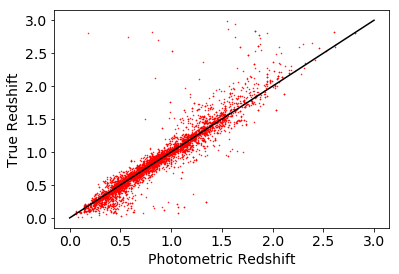

In [277]:
plt.plot(list_mean, cv_data_z, '.', ms=1, color='red')
plt.plot(np.linspace(0.0, 3.0), np.linspace(0.0, 3.0), color='black')
plt.xlabel('Photometric Redshift', fontsize=14)
plt.ylabel('True Redshift', fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

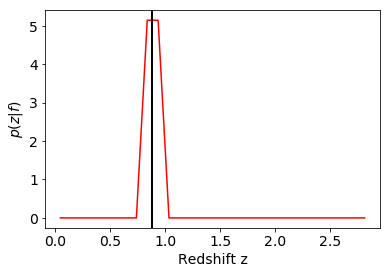

In [288]:
idx_pred = 10

plt.plot(model.midpoints, pred[idx_pred, :], color='red', label='Conditional Distribution '+str(idx_pred))
plt.axvline(cv_data_z[idx_pred], color='black', lw=2, label='True Redshift '+str(idx_pred))
plt.xlabel('Redshift z', fontsize=14)
plt.ylabel(r'$p(z | f)$', fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

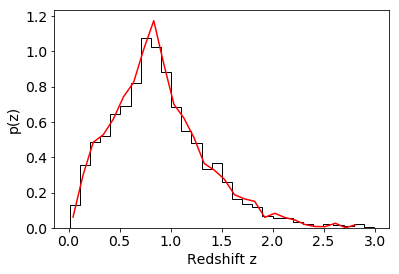

In [278]:
plt.plot(model.midpoints, np.mean(pred, axis=0), color='red')
plt.hist(cv_data_z, n_break, normed=True, histtype='step', color='black')
plt.xlabel('Redshift z', fontsize=14)
plt.ylabel(r'p(z)', fontsize=14)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

Lets see how good these results are. The Y1 requirement for LSS and WL science are defined in the uncertainty in the mean sample redshift distribution. For LSS this uncertainty should be below 0.01 and for WL it should be below 0.005. So lets see how good our results are:

In [171]:
print(np.mean(cv_data_z) - np.mean(list_mean))

0.005674419333914882


A photometric redshift distribution of this accuracy would therefore already meet the LSST Y1 requirements!!! Of course the real situation is much more complicated and it is not possible to achieve reliable redshift estimates using essentially 10 lines of code. In particular we use here a completeley representative training sample, which is unrealistic for LSST, since we will not be able to obtain spectroscopic redshifts at these faint magnitudes. 

This example should be seen as a warning in the application and interpretation of conditional density estimates. They often give very quickly seemingly extremly good results. However in practise these results are very seldomly defendable in the presence of sample selection biases and other systematics. 